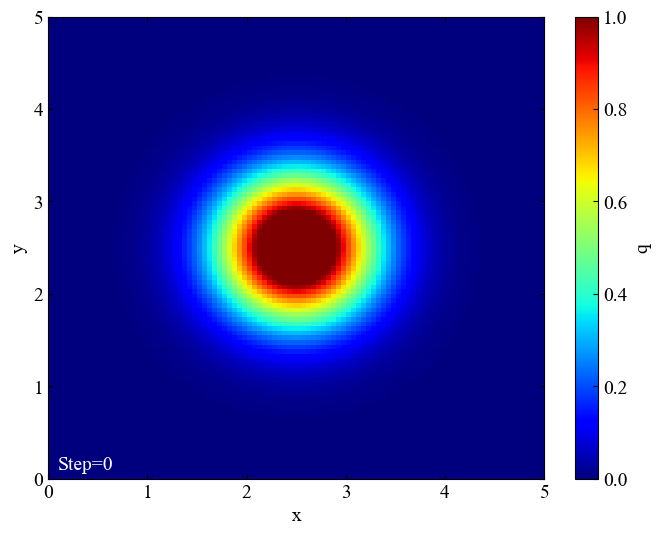

nu_x, nu_y= 0.19999999999999996 0.19999999999999996
Iteration= 0
Iteration= 5
Iteration= 10
Iteration= 15
Iteration= 20
Iteration= 25
Iteration= 30
Iteration= 35
Iteration= 40
Iteration= 45
Iteration= 50
Iteration= 55
Iteration= 60
Iteration= 65
Iteration= 70
Iteration= 75
Iteration= 80
Iteration= 85
Iteration= 90
Iteration= 95
Iteration= 100
Iteration= 105
Iteration= 110
Iteration= 115
Iteration= 120
Iteration= 125
Iteration= 130
Iteration= 135
Iteration= 140
Iteration= 145
Iteration= 150
Iteration= 155
Iteration= 160
Iteration= 165
Iteration= 170
Iteration= 175
Iteration= 180
Iteration= 185
Iteration= 190
Iteration= 195
Iteration= 200
Iteration= 205
Iteration= 210
Iteration= 215
Iteration= 220
Iteration= 225
Iteration= 230
Iteration= 235
Iteration= 240
Iteration= 245
Iteration= 250
Iteration= 255
Iteration= 260
Iteration= 265
Iteration= 270
Iteration= 275
Iteration= 280
Iteration= 285
Iteration= 290
Iteration= 295
Iteration= 300
Iteration= 305
Iteration= 310
Iteration= 315
Iteration=

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
import glob

def initial_field(x_max, y_max, dx, dy):
    ''' 初期場を用意する '''

    # 初期場(x方向をj, y方向をkとする行列を作成→2D画像のデータ構造を模擬)
    x = np.linspace(0, x_max, int(x_max / dx))
    y = np.linspace(0, y_max, int(y_max / dy))
    z = np.zeros((len(y), len(x)))

    # 2D Gaussian(sigma:分散共分散行列, mu:平均ベクトル)
    sigma11 = 0.3
    sigma22 = 0.3
    sigma12 = 0
    sigma21 = 0
    mu_x = 2.5
    mu_y = 2.5
    sigma = np.array([[sigma11, sigma12],
                      [sigma21, sigma22]])
    mu = np.array([mu_x, mu_y])
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)

    # 式のj,kの順番と同じにするため転置させて計算する
    z = z.T
    for j in range(len(z)):
        for k in range(len(z.T)):
            X = np.array([x[j], y[k]])
            z[j, k] = (1 / np.sqrt(2 * np.pi * det_sigma)) * np.exp((-1 / 2) * (X - mu).T @ inv_sigma @ (X - mu))
    z = z.T

    return x, y, z

def boundary_condition(z):
    ''' 分布に境界条件を設定する '''

    # 境界条件(左右上下)
    z[:, 0] = 0
    z[:, -1] = 0
    z[0, :] = 0
    z[-1, :] = 0

    return z

def sol_2d_diffusion(x, y, temp, dt, dx, dy, kp, step, dir, result_interval):
    ''' 2次元拡散方程式を計算する '''

    # 漸化式を反復計算
    temp = temp.T
    for i in range(step):
        temp0 = temp.copy()
        for j in range(1, len(temp) - 1):
            for k in range(1, len(temp.T) - 1):
                r = kp * (dt / dx ** 2)
                s = kp * (dt / dy ** 2)
                temp[j, k] = temp0[j, k] + r * (temp0[j+1, k] - 2 * temp0[j, k] + temp0[j-1, k]) + \
                          s * (temp0[j, k+1] - 2 * temp0[j, k] + temp0[j, k-1])
        # 境界条件を設定
        temp = temp.T
        temp = boundary_condition(temp)
        temp = temp.T

        # 指定した間隔で画像保存
        if i % result_interval == 0:
            print('Iteration=', i)
            temp = temp.T
            plot(x, y, temp, i, dir, 1)
            temp = temp.T

    return


def plot(x, y, z, i, dir, save_flag):
    ''' 関数をプロットする '''

    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの入れ物を用意して上下左右に目盛線を付ける。
    x_size = 8
    y_size = int(0.8 * x_size * (np.max(y) / np.max(x)))
    fig = plt.figure(figsize=(x_size, y_size))
    ax1 = fig.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')


    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    # データをプロットする。
    im = ax1.imshow(z,
                    vmin=0, vmax=1,
                    extent=[np.min(x), np.max(x), np.min(y), np.max(y)],
                    aspect='auto',
                    cmap='jet')

    ax1.text(0.1, 0.1, 'Step='+str(i), color="white")

    # カラーバーを設定する。
    cbar = fig.colorbar(im)
    cbar.set_label('q')

    # 画像を保存する。
    # dirフォルダが無い時に新規作成
    save_dir = dir
    if os.path.exists(save_dir):
        pass
    else:
        os.mkdir(save_dir)

    # 画像保存パスを準備
    path = os.path.join(*[save_dir, str("{:05}".format(i)) + '.png'])

    if save_flag == 1:
        # 画像を保存する
        plt.savefig(path)
    else:
        # グラフを表示する。
        plt.show()
    plt.close()


def create_gif(in_dir, out_filename):
    ''' imgフォルダの複数画像からGIF画像を作る '''

    path_list = sorted(glob.glob(os.path.join(*[in_dir, '*'])))
    imgs = []

    # ファイルのフルパスからファイル名と拡張子を抽出
    for i in range(len(path_list)):
        img = Image.open(path_list[i])
        imgs.append(img)

    # appendした画像配列をGIFにする。durationで持続時間、loopでループ数を指定可能。
    imgs[0].save(out_filename,
                 save_all=True, append_images=imgs[1:], optimize=False, duration=50, loop=0)
    return


if __name__ == '__main__':
    ''' 条件設定を行いシミュレーションを実行、流れのGIF画像を作成する '''

    # 画像保存フォルダと動画ファイル名
    dir = 'img_2d_heat'
    filename = '2d-heat_conduction.gif'

    # 時間項の条件
    dt = 0.0005

    # 空間項の条件
    dx = 0.05
    dy = 0.05
    x_max = 5
    y_max = 5

    # 初期場を用意する
    x, y, temp = initial_field(x_max, y_max, dx, dy)
    #plot(x, y, q, 0, dir, 0)

    # 境界条件を設定する
    temp = boundary_condition(temp)
    plot(x, y, temp, 0, dir, 0)

    # 熱伝達率
    kp = 1

    # 安定性の確認
    nu_x = kp * dt / dx ** 2
    nu_y = kp * dt / dy ** 2
    print('nu_x, nu_y=', nu_x, nu_y)

    # 計算を実行
    sol_2d_diffusion(x, y, temp, dt, dx, dy, kp, 500, dir, 5)

    # GIF動画を作成
    create_gif(dir, filename)